# AI06 - TD05

In [57]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1

### Question 1

En supposant les accélérations constantes entre deux mesures et en utilisant les approximations ci-dessous, calculer les positions du mobile en fonction du temps.

$$x(t+\delta t) = x(t) + v(t)\delta t, \ v(t+\delta t) = v(t) + a(t)\delta t$$


| t   | 0    | 0.5  | 1    | 1.5   |
|:---:| ---- | ---- | ---- | ----- |
| a   | 1    | 0    | -0.5 | 1     |
| v   | 0    | 0.5  | 0.25 | 0.75  |
| x   | 0    | 0    | 0.25 | 0.375 |

### Question 2

On souhaite maintenant utiliser une intégration continue en temps pour estimer les vitesses et positions du mobile. On utilise alors les relations suivantes :

$$x(t + \delta t) = x(t) + \int_t^{t + \delta t} v(t)dt \\
v(t + \delta t) = v(t) + \int_t^{t + \delta t} a(t)dt$$

$$v(0.5) = v(0) + \int_0^ta(t)dt = \int_0^{0.5}1dt = 0.5 \\
x(0.5) = x(0) + \int_0^{0.5}v(t)dt = \int_0^{0.5}tdt = \left[\frac{1}{2}t^2\right]_0^{0.5} = 0.125$$

$$v(1) = v(0.5) + \int_{0.5}^ta(t)dt = v(0.5) = 0.5 \\
x(1) = x(0.5) + \int_{0.5}^tv(t)dt = 0.125\int_{0.5}^10.5dt = 0.375$$

$$v(1.5) = v(1) + \int_1^ta(t)dt = 0.5 + \int_1^{1.5}-0.5dt = 0.25 \\
x(1.5) = x(1) + \int_1^tv(t)dt = 0.375 +\int_1^{1.5}(1-t/2)dt \\= 0.375 + \left[t-\frac{t^2}{4}\right]_1^{1.5} = 0.375 + (1.5 - 1.5^2/4)-(1 - 1/4) = 0.5625$$



| t   | 0    | 0.5      | 1    | 1.5   |
|:---:| ---- | -------- | ---- | ----- |
| a   | 1    | 0        | -0.5 | 1     |
| v   | 0    | 0.5      | 0.5  | 0.25  |
| x   | 0    | 0.125    | 0.375 | 0.5625 |

In [58]:
x = np.linspace(0, 1.5, 1000, endpoint=True)

In [59]:
speed = []
position = []

for i in x:
    if i <=0.5:
        speed.append(i)
        position.append(0.5*i**2)
    elif 0.5<i<=1:
        speed.append(0.5)
        position.append(0.125 + 0.5*(i-0.5))
    else:
        speed.append(0.5 - 0.5*(i-1))
        position.append(0.375 + i - (i**2)/4 - 0.75)

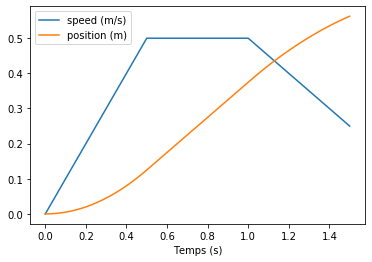

In [60]:
plt.plot(x, speed, label='speed (m/s)')
plt.plot(x, position, label='position (m)')
plt.legend()
plt.xlabel('Temps (s)')
plt.show()

## Exercice 2
### Question 1
\begin{align*}
\Delta x(t) &= x(t + \delta t) - x(t) = v_x(t)\delta t \\
\Delta y(t) &= y(t + \delta t) - y(t) = v_y(t)\delta t \\
\Delta \theta(t) &= \theta (t + \delta t) - \theta (t) = v_\theta(t)\delta t
\end{align*}

Le tableau de mesure de vitesse donne des valeurs toutes les secondes, en mètres par seconde ou radian par seconde. Les valeurs des déplacements sont donc identiques. On ne fait que multiplier toutes les valeurs par la durée d'un intervalle (une seconde).

| t(s)       | 1er intervalle | 2eme intervalle |
| ---------- | -------------- | --------------- |
| $x$(m)       | 0.1            | 0               |
| $y$(m)       | 0.2            | 0.1             |
| $\theta$(rad) | 0.1            | 0.2             |

### Question 2

D'après les formules données dans le cours, nous avons :
$$
\begin{align*}
x(t + \delta t) &= x(t) + \delta (t) = x(t) + \Delta x(t)\cos\theta(t) - \Delta y(t)\sin\theta(t) \\
y(t + \delta t) &= y(t) + \delta (t) = y(t) + \Delta x(t)\sin\theta (t) + \Delta y(t)\cos\theta(t) \\
\theta(t + \delta t) &= \theta (t) + \delta\theta = \theta (t) + v_\theta\delta t
\end{align*}
$$


| t(s)       | 0    | 1    | 2    |
| ---------- | ---- | ---- | ---- |
| x(m)       | 0    | 0.1  | 0.9  |
| y(m)       | 0    | 0.2  | 0.3  |
| $\theta$(rad) | 0    | 0.1  | 0.3  |

### Question 3
On a les valeurs suivantes :
$$
\sigma_{v_x} = 0.05m\cdot s^{-1}, \quad \sigma_{v_y} = 0.05m \cdot s^{-1}, \quad \sigma_{v_\theta} = 0.01 rad \cdot s^{-1}
$$

$$
\begin{align*}
x(t + \delta t) &= x(t) + \delta t(v_x(t)\cos\theta(t) - v_y(t)\sin\theta(t)) \\
y(t + \delta t) &= y(t) + \delta t(\delta t(v_x(t)\sin\theta(t)) + v_y(t)\cos\theta(t)) \\
\theta(t + \delta t) &= \theta (t) + \delta tv_\theta(t)
\end{align*}
$$

$$
\begin{align*}
\sigma_{x(t+\delta t)} &\cong \sqrt{\left(\frac{\partial x(t + \delta t)}{\partial x(t)}\sigma_{x(t)}\right)^2 + \left(\frac{\partial x(t + \delta t)}{\partial v_x(t)}\sigma_{v_x(t)}\right)^2 + \left(\frac{\partial x(t + \delta t)}{\partial v_y(t)}\sigma_{v_y(t)}\right)^2 + \left(\frac{\partial x(t + \delta t)}{\partial \theta(t)}\sigma_{\theta(t)}\right)^2} \\
&\cong \sqrt{\sigma_{x(t)}^2 + (cos\theta(t)\delta t \sigma_{v_x})^2+ (sin\theta(t)\delta t \sigma_{v_y})^2+ ((-\sin\theta(t)v_x(t) - \cos\theta(t)v_y(t))\delta t \sigma_\theta)^2}
\end{align*}
$$

$$
\begin{align*}
\sigma_{y(t+\delta t)} &\cong \sqrt{\left(\frac{\partial y(t + \delta t)}{\partial x(t)}\sigma_{y(t)}\right)^2 + \left(\frac{\partial y(t + \delta t)}{\partial v_x(t)}\sigma_{v_x(t)}\right)^2 + \left(\frac{\partial y(t + \delta t)}{\partial v_y(t)}\sigma_{v_y(t)}\right)^2 + \left(\frac{\partial y(t + \delta t)}{\partial \theta(t)}\sigma_{\theta(t)}\right)^2} \\
&\cong \sqrt{\sigma_{y(t)}^2 + (cos\theta(t)\delta t \sigma_{v_x})^2+ (sin\theta(t)\delta t \sigma_{v_y})^2+ ((\cos\theta(t)v_x(t) - \sin\theta(t)v_y(t))\delta t \sigma_\theta)^2}
\end{align*}
$$

$$
\begin{align*}
\sigma_{x(t+\delta t)} &\cong \sqrt{\left(\frac{\partial \theta(t + \delta t)}{\partial \theta(t)}\sigma_{\theta(t)}\right)^2 + \left(\frac{\partial x(t + \delta t)}{\partial v_\theta(t)}\sigma_{v_\theta(t)}\right)^2 } \\
&\cong \sqrt{\sigma_{\theta(t)}^2 + (\delta t \sigma_{v_\theta})^2}
\end{align*}
$$

L'intervalle de confiance à 95\% correspond aux valeurs obtenues à la question 2 $\pm 2\sigma$ avec $\sigma$ donné par les expressions ci-dessus.
